# Abalone

### 1. Importing required libraries

In [3]:
# Data frames.
import pandas as pd

# Lists
import numpy as np

# Plots
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Statistical plots.
import seaborn as sns

# Scipy for statistics functions
from scipy import stats

# Machine Learning.
import sklearn as sk
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, make_scorer
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

## ML&S - Autumn Tasks

### 2. Reading Data from CSV

In [4]:
# Reading and saving data from abalone.csv as a pandas database
abaloneData = pd.read_csv("data/abalone.csv")

# Checking shape
abaloneShape = abaloneData.shape
print("abaloneData has {} rows and {} columns \n".format(abaloneShape[0], abaloneShape[1]))

# A look at the data
abaloneData.head()

abaloneData has 4177 rows and 9 columns 



sex  length  diameter  height  whole_weight  shucked_weight  viscera_weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   shell_weight  rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7

### 3. Classifications and Measurement Scales

#### Attribute information 
Taken from data source, UC Irvine Machine Learning Repository. Ref: https://archive.ics.uci.edu/dataset/1/abalone

| Name           | Data Type | Measurement| Description                       |
| -------------- | ----------| ---------- | --------------------------------- |
| Sex            | nominal   | M, F, and I| (infant)                          |
| Length         | continuous| mm         | Longest shell measurement         |
| Diameter       | continuous| mm         | perpendicular to length           |
| Height         | continuous| mm         | with meat in shell                |
| Whole weight   | continuous| grams      | whole abalone                     |
| Shucked weight | continuous| grams      | weight of meat                    |
| Viscera weight | continuous| grams      | gut weight (after bleeding)       |
| Shell weight   | continuous| grams      | after being dried                 |
| Rings          | integer   |            | +1.5 gives the age in years       |

#### Categorical Data
* **Nominal Data**  
In the above table, Sex has been identified as a Nominal Data Type. Nominal data has mutually exclusive categories and the values do not have any specific order. For an Abalone, these categories have been identified as: (M for Male, F for Female and I for Infant.).
Ref: https://en.wikipedia.org/wiki/Nominal_category

* **Ordinal Data**  
Ordinal data, is when the data has defined categories such as in Nominal Data, but ordinal data does have have an order to these categories. An exampe might be a dial with "Low", "Medium" and "High" settings on a toaster, we do not inherently know that these settings are equally spaced on some relevant scale, but we can inherently interpret their order.
Ref: https://en.wikipedia.org/wiki/Ordinal_data

* **Discrete Data**  
Discrete data is a categorical Data Type, it has categories and order like the ordinal data, but additionally we know the interval between these values. An example here could be the number of wins in a season a team achieved. There is an upper and lower limit to this data with higher values being better, and a win is a discrete event as the interval.

#### Numerical Data
* **Continuous Data**  
In the above table, length measurements and weight measurements have been identified as Continuous Data. Data is continuous when it can take any value. For a growing Abalone, their lenght and weight meaurements are slowly but steadily increasing and changing as it grows.

* **Integer Data**  
In the above table, the ring count has been identified as an interger. Intergers can only be positive or negative whole numbers, or nothing as in 0. In this case the count of rings on an Abalone, it can not have half rings.

In [5]:
# Checking Python data types on the loaded database
abaloneData.dtypes

sex                object
length            float64
diameter          float64
height            float64
whole_weight      float64
shucked_weight    float64
viscera_weight    float64
shell_weight      float64
rings               int64
dtype: object

#### Python Data Types
* **objects**  
In the above table, sex has been identified as an object. Objects can be numerical values such as intergers or floating point numbers, or strings and even lists. In this case the dataframe type has also been identified as a object as it contains a list of values of different types.

* **float64 Data**  
In the above table, lenght measurements and weight measurements have been identified as floating point numbers. This is beacuse the values are numerical values only, which contain decimal places as the data is continuious.

* **int64 Data**  
In the above table, ring count has been identified as an integer. This saves memory as the ring counts can only be integers as discussed above.

* **Boolean**  
Data can also be set as a Boolean value in python. This means the data only has two states it can take, often 0 or 1, or True or False. Saving this data as a Boolean can use less memory .

#### Units
* **Millimeters**  
A metric unit of length equal to one thousandth of a metre.

* **Grams**  
A metric unit of mass equal to one thousandth of a kilogram.

In [6]:
# Putting this attribute information into a callable database for the plots below
attributeInformation = {
    # Nicely formatted column names
    "Name": [
        "Sex", "Length", "Diameter", "Height", "Whole weight", 
        "Shucked weight", "Viscera weight", "Shell weight", "Rings"
    ],
    "Data Type": [
        "nominal", "continuous", "continuous", "continuous", "continuous", 
        "continuous", "continuous", "continuous", "integer"
    ],
    "Meas.": [
        ["M", "F", "I"], "mm", "mm", "mm", "grams", 
        "grams", "grams", "grams", "total count"
    ],
    "Description": [
        "(infant)", "Longest shell measurement", "perpendicular to length", 
        "with meat in shell", "whole abalone", "weight of meat", 
        "gut weight (after bleeding)", "after being dried", "+1.5 gives the age in years"
    ]
}

### 4. Exploring data

#### Checking if this data has any NaN values
This is being done using the dropna() function, to dropping any rows which contain a NaN value. Then to check how many rows have been dropped, the new dataframe shape is compared to the origional dataframe shape from above.

In [7]:
# Cleaning Data of NaN values
abaloneData.dropna()

# Getting change in data shape, old - new
deltaRows = int(abaloneShape[0])-int(abaloneData.shape[0])
deltaColumns = int(abaloneShape[1])-int(abaloneData.shape[1])

# Checking shape post cleaning
print("abaloneData has lost {} rows and {} columns".format((deltaRows),
        (deltaColumns)))

abaloneData has lost 0 rows and 0 columns


The data has not lost any rows or columns, meaning all cells are populated with data

#### Looking at the data values and spread

In [8]:
# information of the data
abaloneData.describe()

length     diameter       height  whole_weight  shucked_weight  \
count  4177.000000  4177.000000  4177.000000   4177.000000     4177.000000   
mean      0.523992     0.407881     0.139516      0.828742        0.359367   
std       0.120093     0.099240     0.041827      0.490389        0.221963   
min       0.075000     0.055000     0.000000      0.002000        0.001000   
25%       0.450000     0.350000     0.115000      0.441500        0.186000   
50%       0.545000     0.425000     0.140000      0.799500        0.336000   
75%       0.615000     0.480000     0.165000      1.153000        0.502000   
max       0.815000     0.650000     1.130000      2.825500        1.488000   

       viscera_weight  shell_weight        rings  
count     4177.000000   4177.000000  4177.000000  
mean         0.180594      0.238831     9.933684  
std          0.109614      0.139203     3.224169  
min          0.000500      0.001500     1.000000  
25%          0.093500      0.130000     8.000000  
50%          0.171000      0.234000     9.000000  
75%          0.253000      0.329000    11.000000  
max          0.760000      1.005000    29.000000

We can see in the table above that the data has aready been preperated for statistical and machine learning analysis. The data, with the exception of rings column, has been scaled to mostly range from 0 to 1. The rings is an exception here as this is a discrete variable as discussed above.

#### Important summary Statistics
**Mean**  
$ \mu = \frac{1}{N} \sum_{i=1}^{N} x_i $

Where:
- $ \mu $ = mean
- $ N $ = number of data points
- $ x_i $ = each individual data point

A mean is a numeric quantity representing the center of a collection of numbers  
**Standard deviation**  
$ \sigma = \sqrt{\frac{1}{N} \sum_{i=1}^{N} (x_i - \mu)^2} $

Where:
- $ \sigma $ = standard deviation
- $ N $ = number of data points
- $ x_i $ = each individual data point
- $ \mu $= mean of the data points

A standard deviation (or σ) is a measure of how dispersed the data is in relation to the mean. Low, or small, standard deviation indicates data are clustered tightly around the mean, and high, or large, standard deviation indicates data are more spread out.

**Min**  
The least elements in the set

**Max**  
The greatest elements in the set



#### Looking at the Sex

In [9]:
def sexPercentage(data):
    # Geatting a count of each sex and saving it to a dictionary
    sexCount = {
        'Infants' : (data['sex'] == 'I').sum(),
        'Females' : (data['sex'] == 'M').sum(),
        'Males' : (data['sex'] == 'F').sum(),
        }
    
    # Having a look at the totals for each sex
    print("There are {} Infants, {} Males and {} Females in this dataframe".format(sexCount['Infants'], sexCount['Females'], sexCount['Males']))

    # Getting percentage of each sex for plots below
    # Need total population for percentage
    total = len(data['sex'])
    
    # Saving the percentages to a dictionary
    sexPercentages = {
        'Infants': round((sexCount['Infants'] / total) * 100, 2),
        'Females': round((sexCount['Females'] / total) * 100, 2),
        'Males': round((sexCount['Males'] / total) * 100, 2)
        }
    
    # Having a look the percentage split
    print("Infant Percent: {}\nFemale Percent: {}\nMale Percent: {}".format(sexPercentages['Infants'], sexPercentages['Females'], sexPercentages['Males']))
    return sexPercentages

In [10]:
sexPercentages = sexPercentage(abaloneData)

There are 1342 Infants, 1528 Males and 1307 Females in this dataframe
Infant Percent: 32.13
Female Percent: 36.58
Male Percent: 31.29


### 5. Plotting data

#### Using a histogram to visualise the sex distribution

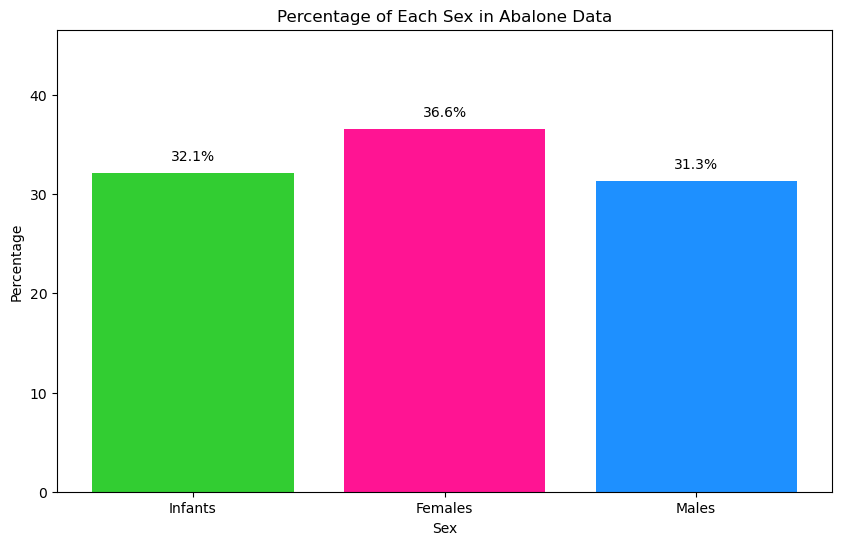

In [11]:
# Using functions so i can call this again leter if needed
# This function takes in the a dictionary and outputs histograms
def percentageBarplot(data):
    # Setting size for barchart
    plt.figure(figsize=(10, 6))
    # Saving the barchart to an object so it can be called below
    # plotting the catagories of sex Vs the percentage if hold of the population
    bars = plt.bar(list(data.keys()), list(data.values()), color=['limegreen', 'deeppink', 'dodgerblue'])

    # Add percentage labels on top of each bar. These were generated using ChatGPT
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval:.1f}%', ha='center', va='bottom')

    # Anding Title, axis lables and shaping the plot using ylim
    plt.title('Percentage of Each Sex in Abalone Data')
    plt.xlabel('Sex')
    plt.ylabel('Percentage')
    plt.ylim(0, max(list(sexPercentages.values())) + 10)  # Add some space above the tallest bar for the label
    plt.show()

# Calling plot
percentageBarplot(sexPercentages)

A bar chart is an appropriate plot for the sex column as the data is Nominal. It is clear from this plot that the data is close to being evenly distributed across the 3 sex categories

#### Looing at a histagram of each numerical variable  

Histagrams give a good visualisation of the mean, skew and spread of data.

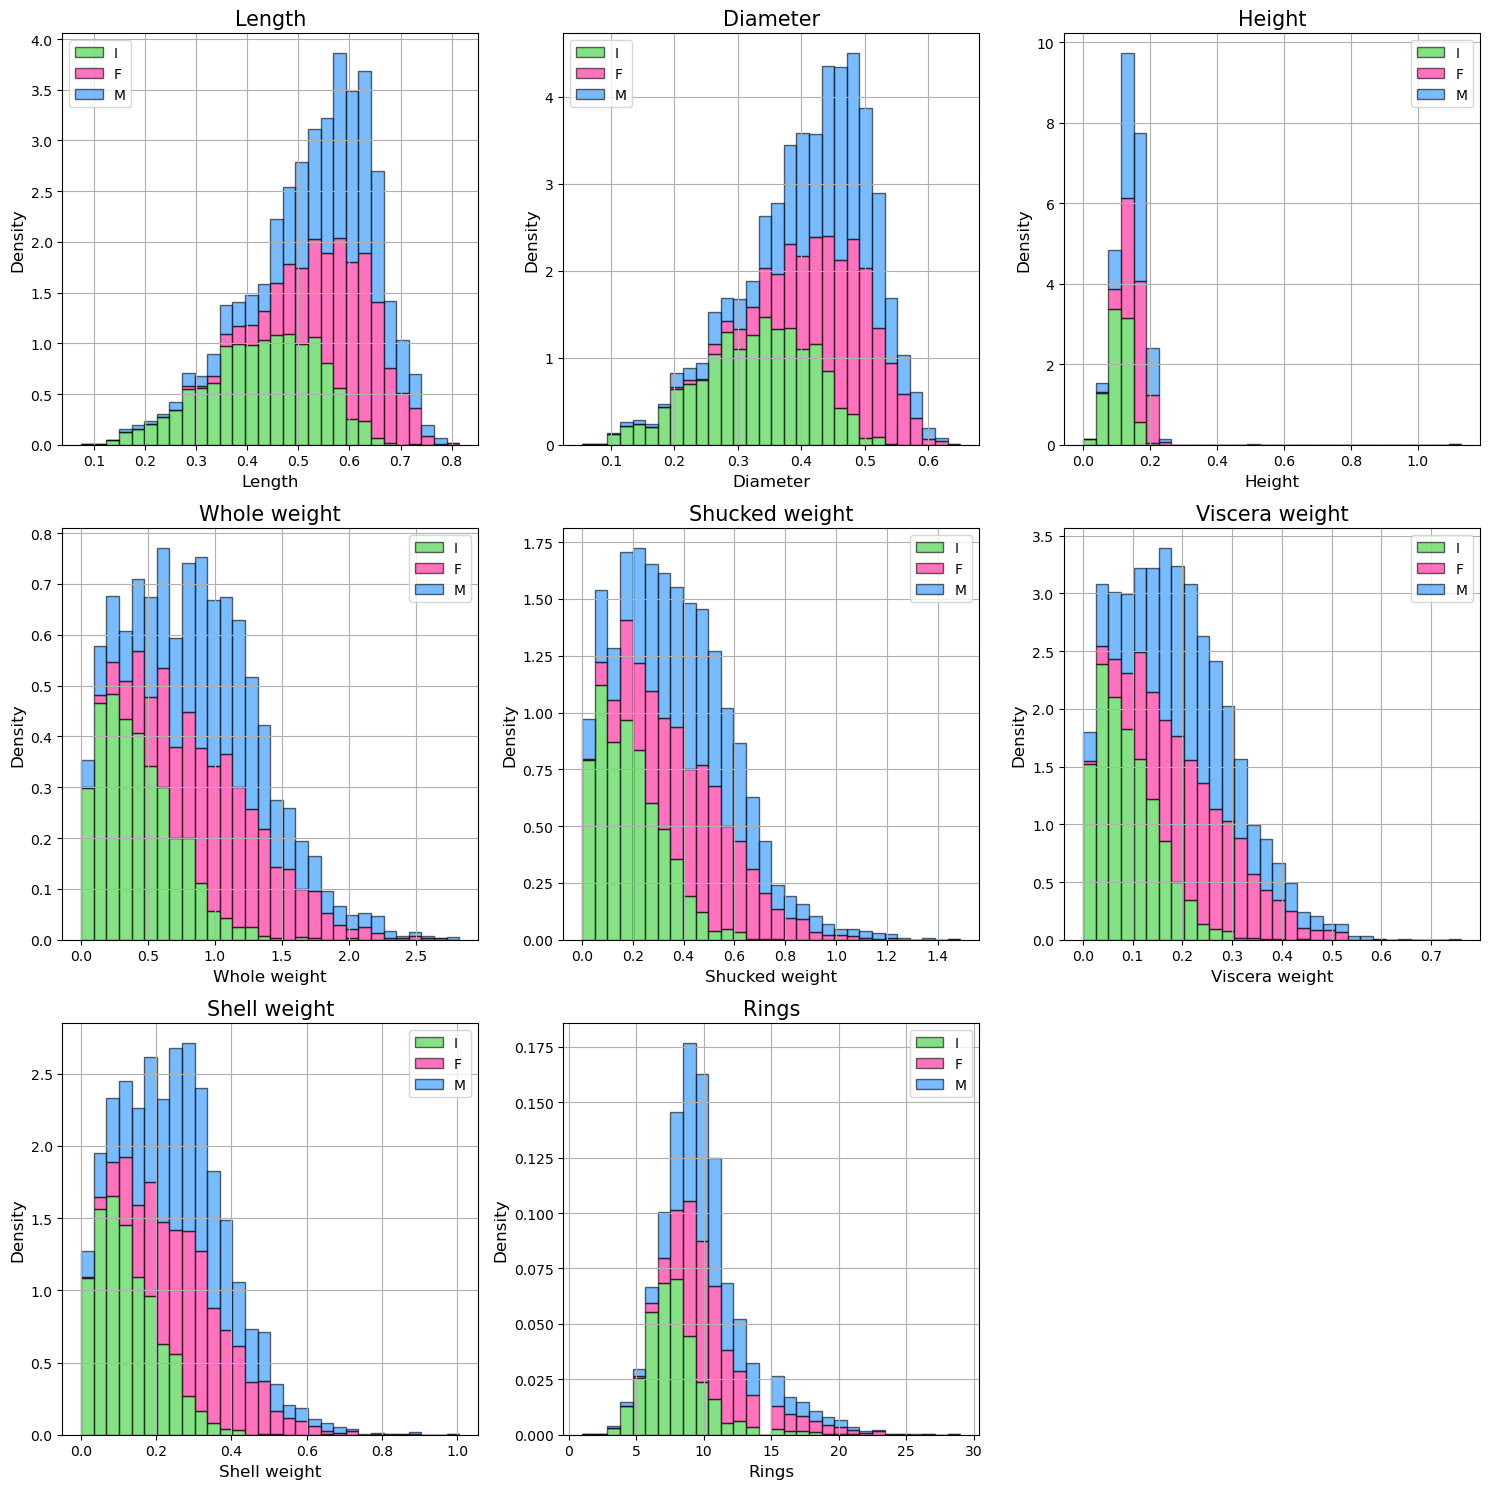

In [12]:
# Plotting a histogram for each feature and colouring it by sex
def plotHistDensity(data, attributeInformation):
    # Setting up the standard colour choice
    colors = {'I': 'limegreen', 'F': 'deeppink', 'M': 'dodgerblue'}
    
    # Getting a list of variable names being plotted
    abaloneCols = data.columns
    # Getting a list of variable names for titles
    abaloneColsNames = attributeInformation['Name']
    
    # Making the plot large
    plt.figure(figsize=(15, 15))

    # There are 8 features to plot
    for i in range(1, 9):
        # Setting up a sub plot for the features
        # From testing 3x3 grid looks best
        plt.subplot(3, 3, i)

        # Prepare data for each histogram.
        # Filter the dataframe column sex for each of the colours dictionary keys, creating 3 lists of data seperated by sex, which are saved in a list.
        featureBySex = [data[data['sex'] == sex][abaloneCols[i]] for sex in list(colors.keys())]
        #if i == 1:
        #    print(data_to_plot)

        # Plot the stacked histogram using stacked = True, using the feature list which has been seperated into list by sex
        plt.hist(featureBySex, bins=30, density=True, stacked=True, color=list(colors.values()), edgecolor='black', label=list(colors.keys()), alpha=0.6)

        # Adding a title and labels
        plt.title(abaloneColsNames[i], size=15, color='black')
        plt.xlabel(abaloneColsNames[i], size=12, color='black')
        plt.ylabel('Density', size=12, color='black')

        # Move legend to upper left for first and second plots
        if i == 1 or i == 2:
            plt.legend(loc='upper left')
        else:
            plt.legend(loc='upper right')

        # Adding the grid
        plt.grid(True)

    # Adjusting layout for better spacing
    plt.tight_layout()

    # Show the plot
    plt.show()

plotHistDensity(abaloneData, attributeInformation)

**These Histograms give some insights into the data.**   
* Infants consitently have the smallest mean, which would make sense as we would expect an infant abalone to be physically smaller and lighter than an adult abalone.  
* Males and Females are relativly very similar in size and weight
* There appear to be some outliers in the height that are significantly away from the mean

#### Looking at a plot of each variable Vs Ring count

In [13]:
def plotSexColour(data, attributeInformation):
    # Getting a list of variable names being plotted
    abaloneCols = data.columns
    # Getting a list of variable names for titles
    abaloneColsNames = attributeInformation['Name']
    # Setting up the standard colour choice
    colors = {'I': 'limegreen', 'F': 'deeppink', 'M': 'dodgerblue'}


    # Making the plot large, as there is good quality given the large sample size
    plt.figure(figsize=(15, 15))

    # There are 7 features to plot this time but keeping the 3x3 grid
    for i in range(1, 8):
        plt.subplot(3, 3, i)
       
       # Extracting the features to be plot
        x = data['rings']
        y = data[abaloneCols[i]]

        # mapping the colours of each data point into a list, to be applied when making scatter plot
        z = abaloneData['sex'].map({'I': 'limegreen', 'F': 'deeppink', 'M': 'dodgerblue'})

        # Making each scatter plot
        # Using large 55 size data points to fill gaps, and alpha 0.25 to see data point beneath each other.
        plt.scatter(x, y, s=55, color=z, alpha=0.25)

        # Adding a title, axis labels, legend and gridlines as part of the function
        plt.title(str(abaloneColsNames[i]), size=15, color='black')
        plt.xlabel('Rings')
        plt.ylabel(f"{abaloneColsNames[i]} Scaled", size=12, color='black')
        plt.legend(loc='upper left')
        plt.grid(True)

        # Adding a tick at 0 on the x-axis
        # geting min and max values on x axis
        x_min, x_max = plt.xlim()
        # if the lowest value was not zero, it is set to zeo
        x_min = 0
        # now plotting over this new range that includes zero
        plt.xlim(x_min, x_max)

        # Adding a tick at 0 on the y-
        # geting min and max values on y axis
        y_min, y_max = plt.ylim()
        # if the lowest value was not zero, it is set to zeo
        y_min = 0
        # now plotting over this new range that includes zero
        plt.ylim(y_min, y_max)
        
        # Using line2D to add a legend, there will be no line, just one data point
        # the markerfacecolor and label are being read from the colors dictionary
        legend_handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=label)
                            for label, color in colors.items()]
        # then putting these 3 lines into a legend
        plt.legend(handles=legend_handles, loc='upper left')

    # Adjusting layout for better spacing
    plt.tight_layout()

    # Show the plot
    plt.show()

plotSexColour(abaloneData, attributeInformation)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

**These Scatter Plots give some insights into the data.** 
* Again the infants tend to have the lowest ring counts and the smallest mean feature values.
* We can see there is significant overlap in the age Vs the feature dimensions for each Sex. There is no clear seperation of Male or Female data here

### Errorbar subsampling

An error bar plot might be easier to interperate differences in feature characteristics based on the sex classes. This will be done by first grouping by sex. Then getting the mean feature value at each ring count and plotting these points for how the mean feature changes with ring count. The standard deviation at each ring count will also be calculated and added to the plot as an error bar.

In [14]:
def plotAverageBySexWithErrorBars(data, attributeInformation):
    # Getting a list of variable names being plotted
    abaloneCols = data.columns
    # Getting a list of variable names for titles
    abaloneColsNames = attributeInformation['Name']
    # Using the same color scheme 
    colors = {'I': 'limegreen', 'F': 'deeppink', 'M': 'dodgerblue'}

    # Making the plot large
    plt.figure(figsize=(15, 15))

    # Again there are 7 features to plot here
    for i in range(1, 8):
        plt.subplot(3, 3, i)
    
        # Isolating feature to be plotted
        feature = abaloneCols[i]

        # Calculate the mean and standard deviation for each feacture, the data is grouped by sex and then the mean and standard deviation is found for each ring count
        # Using the pandas .agg() method to appl
        featureStats = data.groupby(['rings', 'sex'])[feature].agg(['mean', 'std', 'count']).reset_index()


        # Testing removing this line and changing sem to std
        #featureStats['sem'] = featureStats['std'] / np.sqrt(featureStats['count'])



        # Plot the means with error bars using errorbar
        # Making each plot 3 times, this is printing each sex onto the plots one at a time
        for sex in list(colors.keys()):
            # filtering for the sex in this print
            featureStatsBySex = featureStats[featureStats['sex'] == sex]

            # Plotting the error bars, the error bar in the y axis is showing the length of one standard deviation
            # There is no line between the markers as this makes the plot very overcrouded, and in high ring cound the data becomes erratic in value
            plt.errorbar(featureStatsBySex['rings'], featureStatsBySex['mean'], yerr=featureStatsBySex['std'], 
                         marker='o', linestyle='none', color=colors.get(sex, 'grey'), label=sex, alpha = 0.75)

        # Adding a title, axis labels, legend and grid on each plot
        plt.title(f"Mean {abaloneColsNames[i]}", size=15, color='black')
        plt.xlabel('Rings')
        plt.ylabel(f"{abaloneColsNames[i]} Scaled", size=12, color='black')
        plt.legend(loc='upper left')
        plt.grid(True)

        # Adding a tick at 0 on the x-axis
        # geting min and max values on x axis
        x_min, x_max = plt.xlim()
        # if the lowest value was not zero, it is set to zeo
        x_min = 0
        # now plotting over this new range that includes zero
        plt.xlim(x_min, x_max)

        # Adding a tick at 0 on the y-
        # geting min and max values on y axis
        y_min, y_max = plt.ylim()
        # if the lowest value was not zero, it is set to zeo
        y_min = 0
        # now plotting over this new range that includes zero
        plt.ylim(y_min, y_max)

    # Adjusting layout for better spacing
    plt.tight_layout()

    # Show the plot
    plt.show()

plotAverageBySexWithErrorBars(abaloneData, attributeInformation)

**These Error Bar Plots give some insights into the data.** 
* For all 3 sexs, the feature means are very closely correlated up to around 8 rings.
* After around 8 rings, the are still Abalones classed as infant and they tend to be smaller and lighter that the Males or Females.

## What is an abalone?
An abalone is a type of marine mollusk belonging to the family *Haliotidae*, which is commonly known for its distinctive ear-shaped shell. Abalones are a kind of gastropod, meaning they are part of the same class as snails, and they are closely related to limpets and sea snails. Here’s a more detailed description:

### Physical Characteristics:
- **Shell**: The shell of an abalone is its most recognizable feature. It is flattened and slightly spiral-shaped, resembling an ear, which is why they are sometimes referred to as "ear shells." The shell is highly durable and is lined with a layer of nacre, also known as mother-of-pearl, which gives it an iridescent, rainbow-like appearance. This nacre layer is responsible for the beautiful colors that make abalone shells highly prized in jewelry and decorative arts.
- **Respiratory Holes**: Abalone shells have a series of small holes along one side, which are used for breathing, excretion, and releasing eggs and sperm into the water. These holes are gradually sealed off as the abalone grows, and new ones are formed near the edge of the shell.
- **Body**: The body of the abalone is soft and consists of a large, muscular foot that it uses to cling to rocks and other hard surfaces. This foot is incredibly strong, allowing the abalone to grip tightly and resist being dislodged by waves or predators.
- **Tentacles**: Abalones have several tentacles, including two longer ones that extend from the sides of their head. These tentacles are used to sense their environment.


## ML&S - Autumn Project

### Machine Learning and Artifical intelegence

**Machine learning (ML)** is a branch of computer science that uses data and algorithms to enable AI to imitate how humans learn, gradually improving its accuracy. Unlike traditional programming, where specific instructions are coded for the machine to follow, machine learning allows the system to learn from data inputs, identify patterns, and make decisions with minimal human intervention. Over time, as the system processes more data, it becomes better at predicting outcomes, classifying data, or making decisions, thereby "learning" from its experiences. There are several types of machine learning, including supervised learning, where the model is trained on labelled data; unsupervised learning, where the model identifies patterns in unlabelled data; and reinforcement learning, where the model learns by receiving rewards or penalties for its actions. Machine learning has many applications, from recommendation systems on streaming platforms to fraud detection in financial institutions.
Ref: [IBM Machine Learning](https://www.ibm.com/topics/machine-learning)

**Artificial intelligence,** is a broad field of technology that enables computers and machines to simulate human intelligence and problem-solving capabilities. AI encompasses various subfields, including machine learning, natural language processing and computer vision. The goal of AI is to create systems that can perform tasks that would typically require human intelligence, such as understanding natural language, recognizing images, making decisions, and solving complex problems. AI systems can be designed to perform specific tasks, such as diagnosing diseases in healthcare, or to have a more general capability to solve various problems. While the current state of AI is predominantly narrow AI, with systems designed to excel in particular domains, research is ongoing to develop more generalized forms of AI. AI is already transforming industries such as healthcare, where it assists in diagnosing diseases, and autonomous vehicles, where it enables self-driving cars to navigate roads safely.
Ref: [IBM Artificial Intelligence](https://www.ibm.com/topics/artificial-intelligence)


### Learning Methods

**Supervised Learning** is a type of machine learning where the model is trained on a labelled dataset, meaning that each training example is paired with an output label. The primary goal of supervised learning is to learn a mapping from inputs to outputs based on the examples provided so that the model can predict the output for new, unseen data. In this approach, the algorithm iteratively makes predictions on the training data and adjusts the model based on the errors it makes, gradually improving its accuracy. Supervised learning is commonly used for tasks such as classification, where the output is a discrete label, and regression where the output is a continuous value. The success of supervised learning largely depends on the quality and size of the labelled dataset, as the model needs a substantial amount of data to learn effectively.
Ref: [IBM Supervised Learnin](https://www.ibm.com/topics/supervised-learning)

**Unsupervised Learning** is a type of machine learning where the model is trained on data that is not labelled. In unsupervised learning, the algorithm is given a dataset and tasked with finding patterns or structures within the data without explicit guidance on what those patterns should be. Since there are no labels, the algorithm doesn't have a predefined output to predict; instead, it tries to identify natural groupings or clusters within the data, understand the underlying distribution, or reduce the dimensionality of the data to highlight important features. Standard techniques in unsupervised learning include clustering algorithms, like K-means, which group data points into clusters based on similarity. Unsupervised learning is beneficial in exploratory data analysis, customer segmentation, and anomaly detection, where patterns and relationships are unknown beforehand.
Ref: [IBM Unsupervised Learning](https://www.ibm.com/topics/unsupervised-learning")


#### Classification Algorithms 

**_Neural Networks_**  
Neural networks are a class of algorithms inspired by the human brain's structure and function. They consist of interconnected layers of nodes (neurons) where each connection has an associated weight. Neural networks are particularly powerful for complex tasks such as image recognition, natural language processing, and any scenario where patterns in data are highly non-linear. They work by passing inputs through multiple layers of neurons, applying activation functions, and adjusting weights using backpropagation to minimise prediction errors. Deep neural networks, which have many hidden layers, are a subset of neural networks capable of learning hierarchical representations of data, making them exceptionally effective in tasks like image classification and speech recognition.  
_Refs: [IBM Neural Networks](https://www.ibm.com/topics/neural-networks), [scikit-learn Neural Networks](https://scikit-learn.org/stable/modules/neural_networks_supervised.html#neural-networks-supervised)_

**_Linear Regression_**  
Linear regression is a basic yet powerful algorithm for predicting a continuous outcome based on one or more input features. It assumes a linear relationship between the input variables (independent variables) and the output variable (dependent variable). The goal is to fit a line that best represents the relationship between the variables. This is achieved by minimizing the sum of the squared differences between the actual and predicted values. Although linear regression is primarily a regression technique, it can be adapted for binary classification tasks by setting a threshold on the predicted values.
 
**_Logistic Regression_**  
Logistic regression is a popular algorithm used for binary classification tasks. Unlike linear regression, which predicts a continuous value, logistic regression predicts the probability that a given input belongs to a particular class. It uses the logistic function (sigmoid function) to map predicted values to probabilities, which are then used to classify the input into one of two categories. Logistic regression is widely used in medicine, finance, and social sciences for disease diagnosis, credit scoring, and binary outcome prediction.

**_Clustering_**  
Clustering is an unsupervised learning algorithm that groups similar data points into clusters. Clustering aims to identify natural groupings within the data without prior knowledge of the categories. Standard clustering algorithms include K-means, which partitions data into a predefined number of clusters, and hierarchical clustering, which builds a tree of clusters. Clustering is useful for customer segmentation, market research, and anomaly detection tasks.
 
**_Decision Trees_**  
Decision trees are an algorithm used for classification and regression tasks. They work by splitting the data into subsets based on the value of input features, resulting in a tree-like model of decisions. Each node in the tree represents a decision based on a feature, and each branch represents the outcome of that decision. Decision trees are easy to interpret and visualise, making them popular for tasks like medical diagnosis, where understanding the decision-making process is crucial.
  
**_Random Forests_**  
Random forests are an ensemble learning method that builds multiple decision trees and merges their predictions to improve accuracy and reduce overfitting. Each tree in the forest is trained on a random subset of the data, and the final prediction is made by averaging the predictions of all the trees (for regression) or by taking the majority vote (for classification). Random forests are robust, versatile, and capable of handling large datasets with high-dimensional features, making them suitable for various applications.

**_K-Nearest Neighbours (KNN)_**  
K-Nearest Neighbours is a simple, instance-based learning algorithm for classification and regression tasks. In KNN, a new data point is classified based on the majority class of its K nearest neighbours in the feature space. The distance between data points is typically measured using Euclidean distance, and the algorithm is highly intuitive and easy to implement. KNN is often used in recommendation systems, image recognition, and other applications where similarity between data points is essential.  
_Ref: [IBM K-Nearest Neighbors](https://www.ibm.com/topics/knn)_

## Deep Dive into scikit-learn Neural Networks

A neural network in scikit-learn, specifically the `MLPClassifier` for classification tasks, is a powerful tool for modelling complex relationships in data. Here's a detailed overview of how it works and how it can be optimised:

#### **How a Neural Network Works**

A neural network is composed of layers of interconnected nodes (neurons). Each neuron receives input, processes it through a weighted sum, applies an activation function, and passes the result to the next layer. The network typically consists of an input layer, one or more hidden layers, and an output layer.

1. **Input Layer**: This layer receives the input data, where each neuron corresponds to one feature in the dataset.
   
2. **Hidden Layers**: These layers perform computations and transformations on the input data. The number of neurons in each hidden layer and the number of hidden layers determine the network's capacity to learn complex patterns.

3. **Output Layer**: This layer produces the final prediction. In a classification task, the output layer usually applies a softmax activation function to produce probabilities for each class.

#### **Activation Functions**

Activation functions are a crucial part of neural networks. They introduce non-linearity into the model, enabling the network to learn complex patterns and relationships in the data. Common activation functions used in scikit-learn neural networks are:

- **Sigmoid / Logistic Activation Function**:  
  The sigmoid function maps any real-valued number into a value between 0 and 1. It is often used in the output layer of binary classification problems.
  _Ref: [V7 Labs - Sigmoid Activation Function](https://www.v7labs.com/blog/neural-networks-activation-functions#:~:text=Sigmoid%20%2F%20Logistic%20Activation%20Function,to%200.0%2C%20as%20shown%20below.)_

- **ReLU (Rectified Linear Unit)**:  
  ReLU is the most used activation function in hidden layers of neural networks. It outputs zero for negative inputs and the input itself for positive inputs, introducing non-linearity. ReLU is computationally efficient and works well in deep networks.
  _Reg: [Towards Data Science - Activation Functions](https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6)_

- **Tanh (Hyperbolic Tangent Function)**:  
  The Tanh function maps input values to a range between -1 and 1, providing stronger gradients than the sigmoid function. It is often used in hidden layers when a symmetric output is desired.

- **Softmax**:  
  Softmax is typically used in the output layer of a multi-class classification network. It converts the output scores into probabilities, ensuring that the sum of the probabilities for each class is 1. The class with the highest probability is selected as the model's prediction.

#### **Optimization in scikit-learn Neural Networks**

1. **Weight Initialization**:  
   The network's weights are initialized randomly or using strategies like Xavier initialization, which can help speed up convergence during training.

2. **Backpropagation**:  
   Backpropagation is the core mechanism for training a neural network. It involves calculating the gradient of the loss function with respect to each weight by applying the chain rule and then updating the weights using an optimisation algorithm like Stochastic Gradient Descent (SGD) or Adam.

3. **Learning Rate**:  
   The learning rate controls the size of the steps taken during optimization. A high learning rate can lead to overshooting the optimal solution, while a low learning rate can result in slow convergence.

4. **Regularization**:  
   Regularisation techniques like L2 regularisation (also known as Ridge) can be applied to the weights to prevent overfitting. Dropout is another regularization technique in which a random subset of neurons is ignored during training, which helps reduce overfitting by preventing the network from becoming too reliant on particular paths.

5. **Early Stopping**:  
   Early stopping is a technique for preventing overfitting. It involves monitoring performance on a validation set and stopping the training when performance no longer improves.

6. **Hyperparameter Tuning**:  
   Hyperparameters like the number of layers, number of neurons per layer, learning rate, batch size, and the choice of activation function can be optimised using techniques like GridSearchCV or RandomizedSearchCV in scikit-learn. This process involves systematically testing different combinations of hyperparameters to find the best configuration for the network.


### Cleaning Data

Splitting the data into a testing set and training set

In [15]:
# Splitting the data into a training set and a test set
train, test = sk.model_selection.train_test_split(abaloneData, test_size=0.3, random_state=0)

# Checking shape of the training and test features
train.shape, test.shape

((2923, 9), (1254, 9))

In [16]:
# Getting a list of variable names to loop though for plots
abaloneCols = train.columns

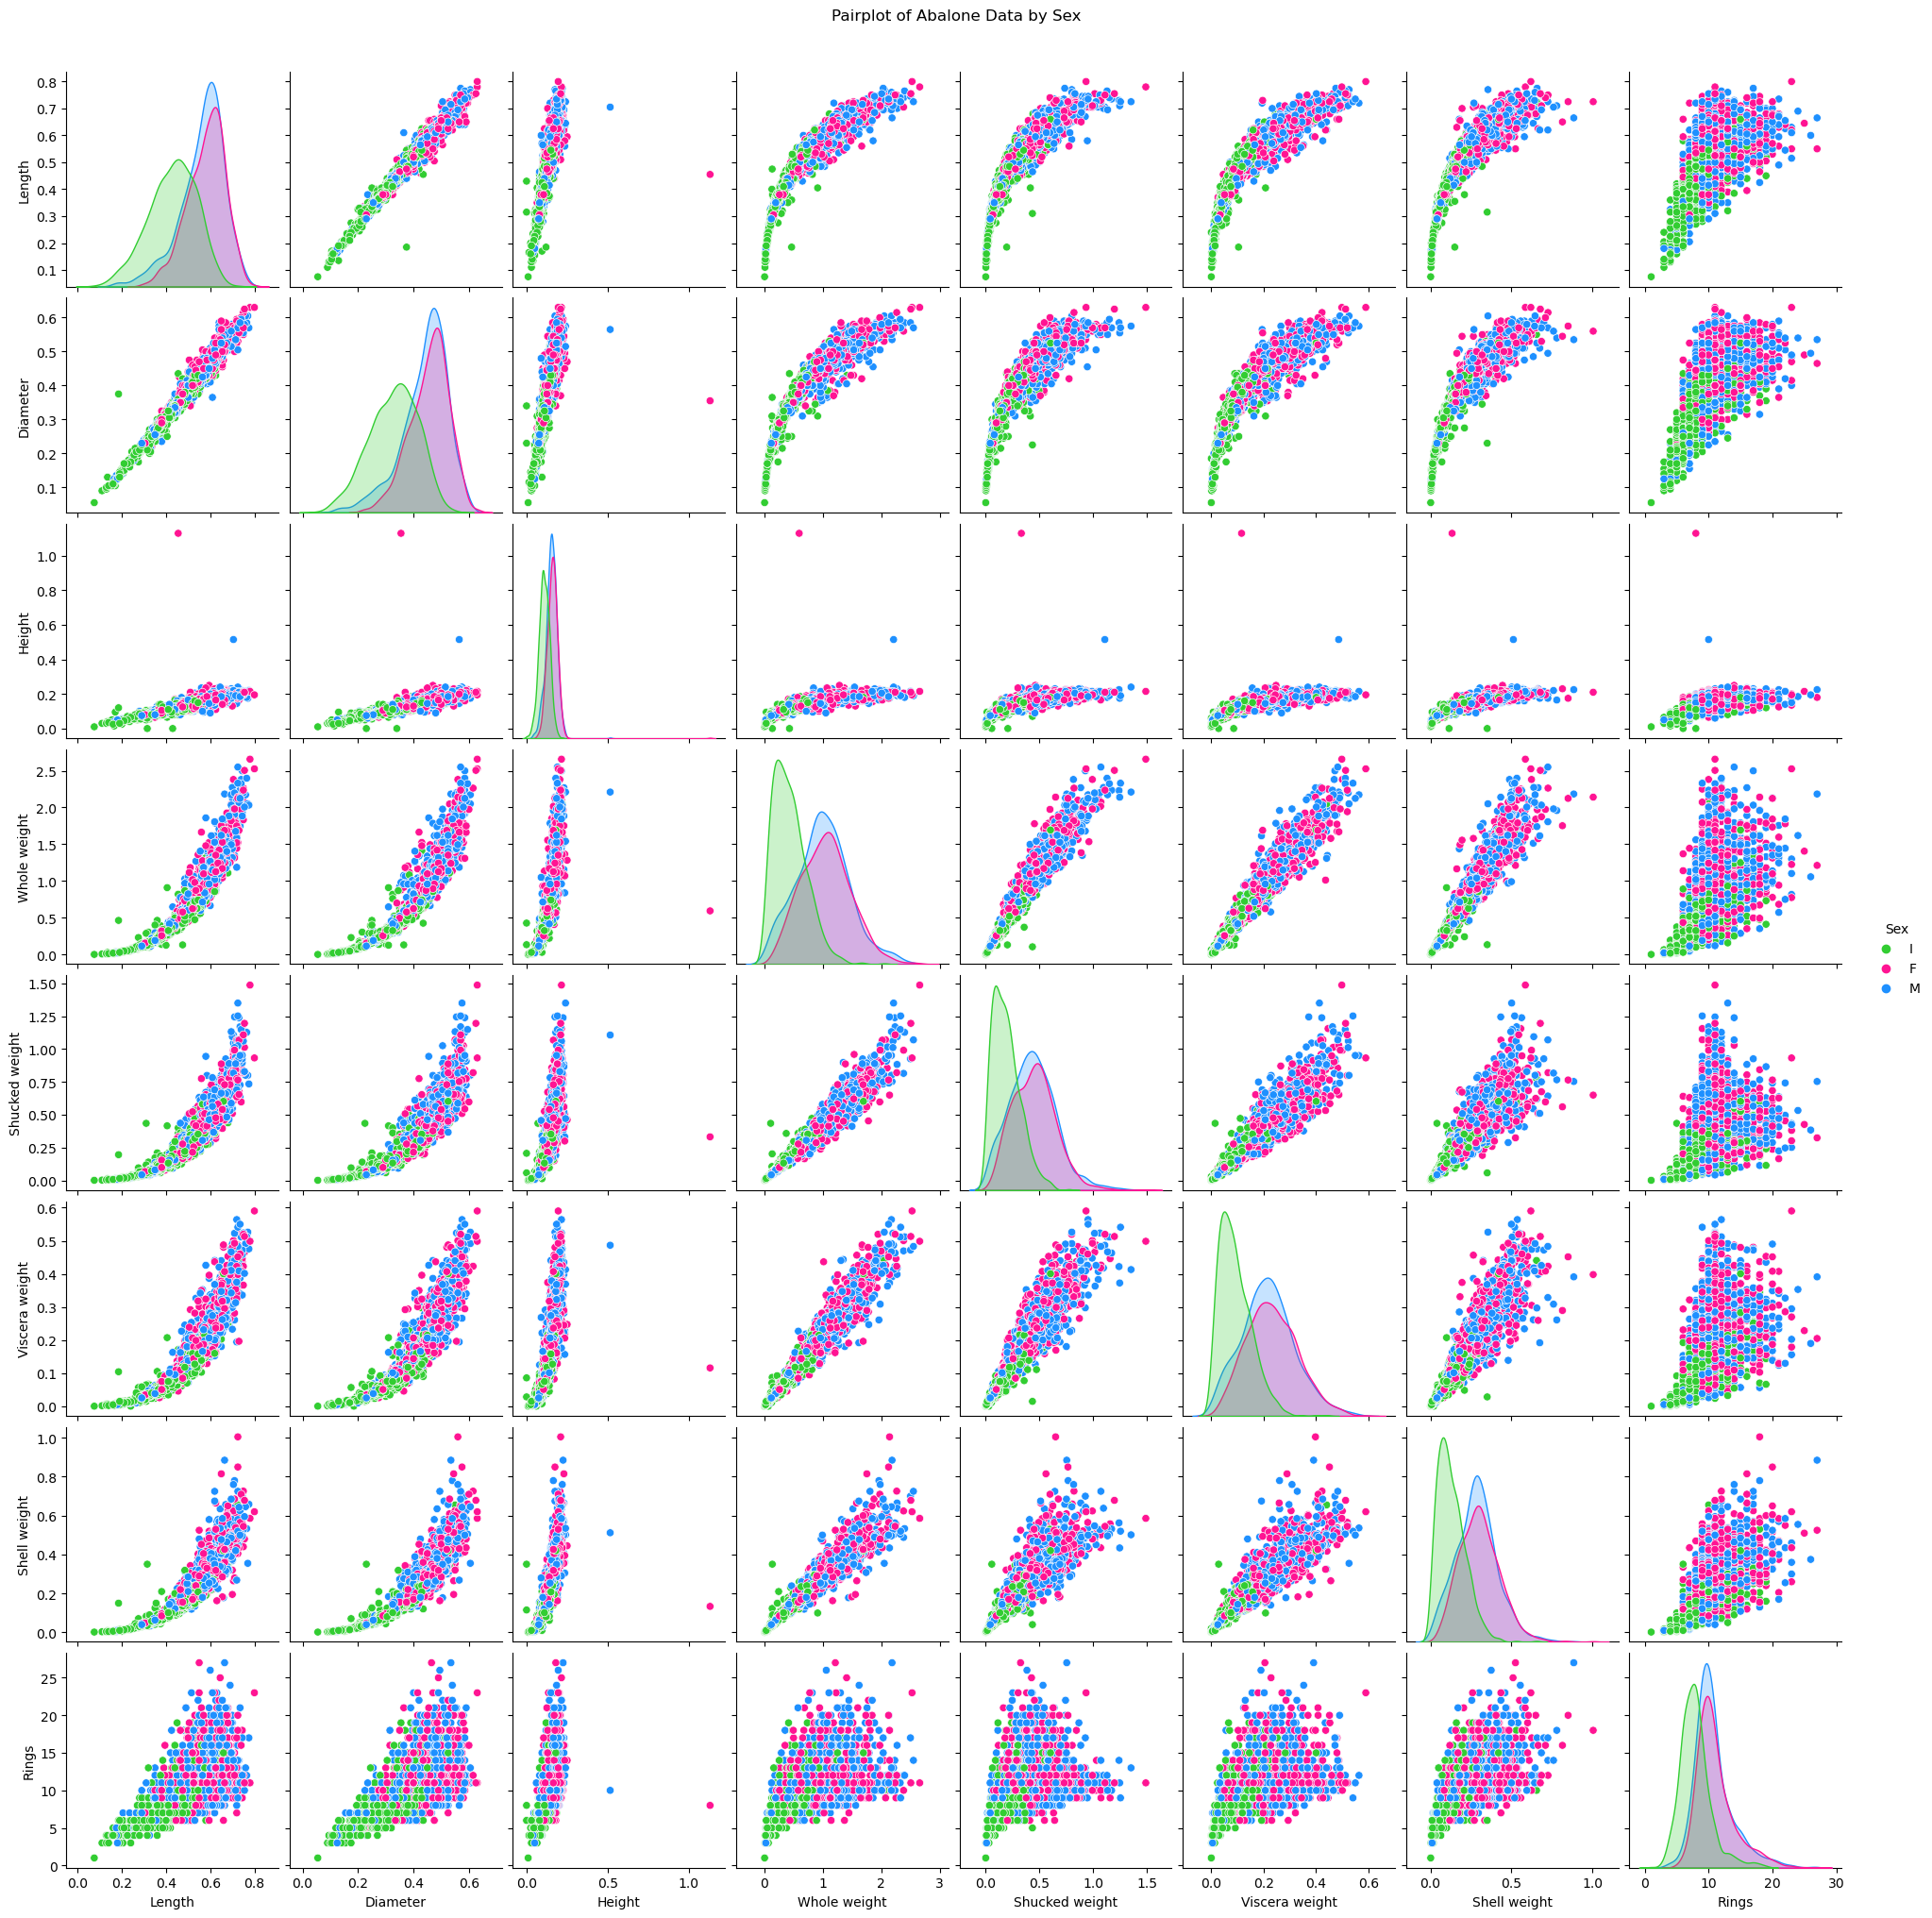

In [17]:
# Colors and palette
colors = {'I': 'limegreen', 'F': 'deeppink', 'M': 'dodgerblue',}
palette = [colors['I'], colors['F'], colors['M']]
hue_order = ['I', 'F', 'M']

# Create the pairplot
pairplot = sns.pairplot(train, hue='sex', palette=palette, hue_order=hue_order)

# Rename axis labels using the attribute information
axis_labels = attributeInformation['Name']
num_vars = len(axis_labels)

for i in range(num_vars - 1):  # Off by one because `attributeInformation` may include the 'sex' column
    for j in range(num_vars - 1):
        if i != j:  # Scatter plots
            pairplot.axes[i, j].set_xlabel(axis_labels[j + 1])
            pairplot.axes[i, j].set_ylabel(axis_labels[i + 1])
        else:  # Diagonal plots
            pairplot.axes[i, j].set_xlabel(axis_labels[j + 1])
            pairplot.axes[i, j].set_ylabel(axis_labels[j + 1])

# Adjust plot titles and layout
pairplot.fig.suptitle('Pairplot of Abalone Data by Sex', y=1.02)
pairplot._legend.set_title('Sex')
plt.show()

### Checking Correlation

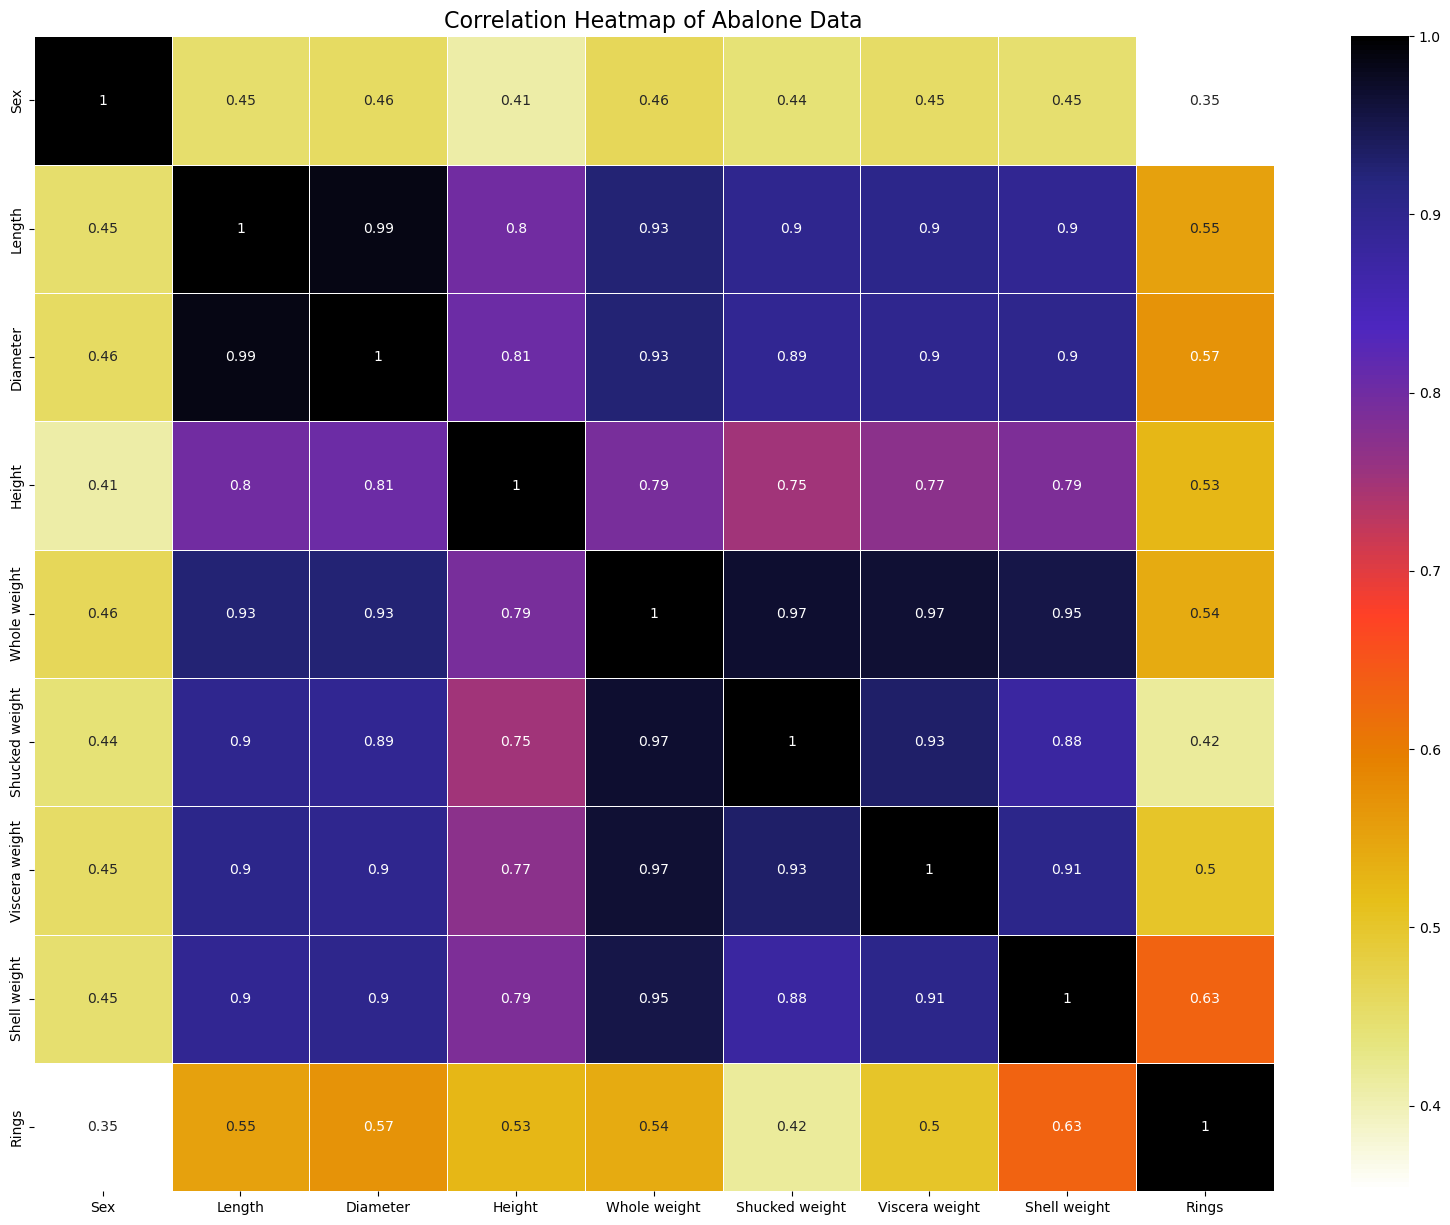

In [18]:
# Changing the sex column to a floating point 0, 0.5 or 1 for the .corr() function
# 1 = Female 
# 0 = Male
# 0.5 = Infant

# Setting up output dataframe
abaloneDataCorr = train.copy()
# Changing the stings to floaring point numbers in the training data
abaloneDataCorr['sex'] = abaloneDataCorr['sex'].map({'F' : 0.5, 'M' : 1, 'I' : 0})

# Compute correlation matrix
cor = abaloneDataCorr.corr()

# Prepare labels from attributeInformation (excluding 'Sex')
labels = attributeInformation['Name']

# Plot the heatmap with labels
plt.figure(figsize=(20, 15))
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r, linewidths=.5, xticklabels=labels, yticklabels=labels)
plt.title('Correlation Heatmap of Abalone Data', size=16)
plt.show()

## Training a Model

Splitting the training and testing dataframes into remove the feature we are trying to predict, in this case the rings

In [19]:
X_train = train[['length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight']]

y_train = train['rings']

X_test = test[['length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight']]

y_test = test['rings']

train.head()

sex  length  diameter  height  whole_weight  shucked_weight  \
1376   M   0.620     0.510   0.175        1.2815          0.5715   
1225   I   0.345     0.255   0.085        0.2005          0.1050   
2722   I   0.375     0.275   0.095        0.2295          0.0950   
3387   M   0.545     0.410   0.145        0.8730          0.3035   
2773   F   0.580     0.465   0.145        0.9865          0.4700   

      viscera_weight  shell_weight  rings  
1376          0.2385         0.390     10  
1225          0.0370         0.050      5  
2722          0.0545         0.066      7  
3387          0.1960         0.310     18  
2773          0.2155         0.250     11

#### Running a large grid search to find inital settings

In [20]:
# setting up a grid search to tune an MLP Classifier Ref: 14
model = MLPClassifier(max_iter=10000, random_state=0, early_stopping=True, n_iter_no_change=10, validation_fraction=0.1, verbose=True)

#set up patameters Ref: https://www.kaggle.com/code/zwan7415/machine-leanring-project-abalone-study
parameters = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50), (50, 50, 50), (100, 100, 100)],
    'activation': ['tanh', 'relu', 'logistic'],
    'solver': ['adam', 'sgd'], 
    'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1],  # Regularization term
    'learning_rate': ['constant', 'adaptive'],  # Focus on adaptive learning rate
    'learning_rate_init': [0.001, 0.01, 0.05],  # Initial learning rate
    'momentum': [0.9, 0.95, 0.99],  # Momentum for gradient descent
    'beta_1': [0.9, 0.99],  # Beta_1 parameter for Adam solver
    'beta_2': [0.999, 0.9999]  # Beta_2 parameter for Adam solver
    }

In [21]:
# Perfroming grid search using the above lists
best_model = GridSearchCV(model, parameters, cv=10, n_jobs=-1, verbose=3, scoring=make_scorer(accuracy_score))

## Grid search
This gridsearchCV took 60 minutes to run on my computer, so I have commented it out from running each time.

In [22]:
# Fitting the model using this grid search
#best_model.fit(X_train, y_train)

# Print the best parameters and the best score
#print("Best parameters found: ", best_model.best_params_)
#print("Best cross-validation score: {:.2f}".format(best_model.best_score_))

The results from this 60 minute grid search were:  

Validation score: 0.268199  
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Learning rate too small. Stopping.  
Best parameters found:  {'activation': 'relu', 'alpha': 0.0001, 'beta_1': 0.9, 'beta_2': 0.999, 'hidden_layer_sizes': (100, 100, 100), 'learning_rate': 'adaptive', 'learning_rate_init': 0.05, 'momentum': 0.99, 'solver': 'sgd'}  
Best cross-validation score: 0.28  

## More targeted grid search

In [23]:
# setting up a grid search to tune an MLP Classifier Ref: 14
modelTwo = MLPClassifier(max_iter=10000, random_state=0, early_stopping=True, validation_fraction=0.1, n_iter_no_change=30, verbose=True)


#set up patameters Ref: https://www.kaggle.com/code/zwan7415/machine-leanring-project-abalone-study
parametersTwo = {
    'hidden_layer_sizes': [(100,), (50, 50), (100, 50)],
    'activation': ['relu'],
    'solver': [ 'sgd'], 
    'alpha': [0.001, 0.01, 0.04, 0.1],  # Regularization term
    'learning_rate': ['constant', 'adaptive'],  # Focus on adaptive learning rate
    'learning_rate_init': [0.001, 0.005],  # Initial learning rate
    'momentum': [0.95, 0.99],  # Momentum for gradient descent
    }


# Perfroming grid search using the above lists
best_modelTwo = GridSearchCV(modelTwo, parametersTwo, cv=10, n_jobs=-1, verbose=3, scoring=make_scorer(accuracy_score))

# Fitting the model using this grid search
#best_modelTwo.fit(X_train, y_train)

# Print the best parameters and the best score
#print("Best parameters found: ", best_modelTwo.best_params_)
#print("Best cross-validation score: {:.2f}".format(best_modelTwo.best_score_))

Validation score: 0.272031  
Validation score did not improve more than tol=0.000100 for 30 consecutive epochs. Learning rate too small. Stopping.  
Best parameters found:  {'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (100, 50), 'learning_rate': 'adaptive', 'learning_rate_init': 0.005, 'momentum': 0.99, 'solver': 'sgd'}  
Best cross-validation score: 0.27  

## Third times a charm

In [24]:
# setting up a grid search to tune an MLP Classifier Ref: 14
modelThree = MLPClassifier(max_iter=10000, random_state=0, early_stopping=True, validation_fraction=0.1, n_iter_no_change=30, verbose=True)


#set up patameters Ref: https://www.kaggle.com/code/zwan7415/machine-leanring-project-abalone-study
parametersThree = {
    'hidden_layer_sizes': [(100, 50), (100, 100, 50), (200, 100, 50)],
    'activation': ['relu'],
    'solver': [ 'sgd', 'adam'], 
    'alpha': [0.1, 0.2, 0.5],  # Regularization term
    'learning_rate': ['constant', 'adaptive'],  # Focus on adaptive learning rate
    'learning_rate_init': [0.002, 0.005, 0.01],  # Initial learning rate
    'momentum': [0.95, 0.99],  # Momentum for gradient descent
    }


# Perfroming grid search using the above lists
best_modelThree = GridSearchCV(modelThree, parametersThree, cv=10, n_jobs=-1, verbose=3, scoring=make_scorer(accuracy_score))

# Fitting the model using this grid search
#best_modelThree.fit(X_train, y_train)

# Print the best parameters and the best score
#print("Best parameters found: ", best_modelThree.best_params_)
#print("Best cross-validation score: {:.2f}".format(best_modelThree.best_score_))

Best parameters found:  {'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (200, 100, 50), 'learning_rate': 'constant', 'learning_rate_init': 0.01, 'momentum': 0.95, 'solver': 'adam'}
Best cross-validation score: 0.28

## Overfit, Turning it back a bit

In [25]:
# setting up a grid search to tune an MLP Classifier Ref: 14
modelFour = MLPClassifier(max_iter=10000, random_state=0, early_stopping=True, validation_fraction=0.1, n_iter_no_change=70, verbose=True)


#set up patameters Ref: https://www.kaggle.com/code/zwan7415/machine-leanring-project-abalone-study
parametersFour = {
    'hidden_layer_sizes': [(200, 100, 50)],
    'activation': ['relu'],
    'solver': [ 'sgd'], 
    'alpha': [0.075, 0.1, 0.125],  # Regularization term
    'learning_rate': [ 'adaptive'],  # Focus on adaptive learning rate
    'learning_rate_init': [0.0075, 0.01, 0.015],  # Initial learning rate
    'momentum': [0.95, 0.975, 0.99],  # Momentum for gradient descent
    }


# Perfroming grid search using the above lists
best_modelFour = GridSearchCV(modelThree, parametersFour, cv=10, n_jobs=-1, verbose=3, scoring=make_scorer(accuracy_score))

# Fitting the model using this grid search
#best_modelFour.fit(X_train, y_train)

# Print the best parameters and the best score
#print("Best parameters found: ", best_modelFour.best_params_)
#print("Best cross-validation score: {:.2f}".format(best_modelFour.best_score_))

Best parameters found:  {  'activation': 'relu',   'alpha': 0.075,   'hidden_layer_sizes': (200, 100, 50),   'learning_rate': 'adaptive',   'learning_rate_init': 0.01,   'momentum': 0.99,   'solver': 'sgd'  }  
Best cross-validation score: 0.29

## Final touches

In [26]:
# setting up a grid search to tune an MLP Classifier Ref: 14
modelFour = MLPClassifier(max_iter=100000, random_state=0, early_stopping=True, validation_fraction=0.1, n_iter_no_change=70, verbose=True)


#set up patameters Ref: https://www.kaggle.com/code/zwan7415/machine-leanring-project-abalone-study
parametersFour = {
    'hidden_layer_sizes': [(150, 85, 30), (200, 100, 50), (215, 115, 64), (225, 125, 75)],
    'activation': ['relu'],
    'solver': [ 'sgd'], 
    'alpha': [0.075, 0.080],  # Regularization term
    'learning_rate': [ 'adaptive'],  # Focus on adaptive learning rate
    'learning_rate_init': [0.00865, 0.01, 0.0125],  # Initial learning rate
    'momentum': [0.99],  # Momentum for gradient descent
    }


# Perfroming grid search using the above lists
best_modelFour = GridSearchCV(modelThree, parametersFour, cv=10, n_jobs=-1, verbose=3, scoring=make_scorer(accuracy_score))

# Fitting the model using this grid search
#best_modelFour.fit(X_train, y_train)

# Print the best parameters and the best score
#print("Best parameters found: ", best_modelFour.best_params_)
#print("Best cross-validation score: {:.2f}".format(best_modelFour.best_score_))

Best parameters found:  {'activation': 'relu', 'alpha': 0.075, 'hidden_layer_sizes': (150, 85, 30), 'learning_rate': 'adaptive', 'learning_rate_init': 0.0125, 'momentum': 0.99, 'solver': 'sgd'}
Best cross-validation score: 0.29

# The Final, tuned MPLClassifier

In [27]:
# Train the MLPClassifier
mlp = MLPClassifier(n_iter_no_change=200, activation='relu', alpha= 0.075, hidden_layer_sizes= (150, 85, 30), learning_rate='adaptive', learning_rate_init= 0.0125, max_iter= 1000000, solver= 'sgd', random_state=0, verbose=True, momentum= 0.99)
mlp.fit(X_train, y_train)

# Perform cross-validation and print the cross-validation score
cv_scores = sk.model_selection.cross_val_score(mlp, X_train, y_train, cv=10)
print(f"Cross-validation accuracy scores: {cv_scores}")
print(f"Mean cross-validation accuracy: {cv_scores.mean():.4f}")

# Make predictions
y_pred = mlp.predict(X_test)

# Calculate and print the accuracy on the test set
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test set accuracy: {test_accuracy:.4f}")

Iteration 1, loss = 3.21918397
Iteration 2, loss = 2.82826109
Iteration 3, loss = 2.63169976
Iteration 4, loss = 2.53413160
Iteration 5, loss = 2.46189158
Iteration 6, loss = 2.35891315
Iteration 7, loss = 2.33045514
Iteration 8, loss = 2.27653696
Iteration 9, loss = 2.25753905
Iteration 10, loss = 2.24164853
Iteration 11, loss = 2.21715306
Iteration 12, loss = 2.20186204
Iteration 13, loss = 2.18889688
Iteration 14, loss = 2.17704464
Iteration 15, loss = 2.16181602
Iteration 16, loss = 2.14457160
Iteration 17, loss = 2.13281101
Iteration 18, loss = 2.11440432
Iteration 19, loss = 2.09037615
Iteration 20, loss = 2.07136809
Iteration 21, loss = 2.05648335
Iteration 22, loss = 2.04102027
Iteration 23, loss = 2.03397326
Iteration 24, loss = 2.02249387
Iteration 25, loss = 2.01132130
Iteration 26, loss = 2.00316310
Iteration 27, loss = 2.01006165
Iteration 28, loss = 1.99683752
Iteration 29, loss = 1.99482677
Iteration 30, loss = 1.98884572
Iteration 31, loss = 1.98387913
Iteration 32, los

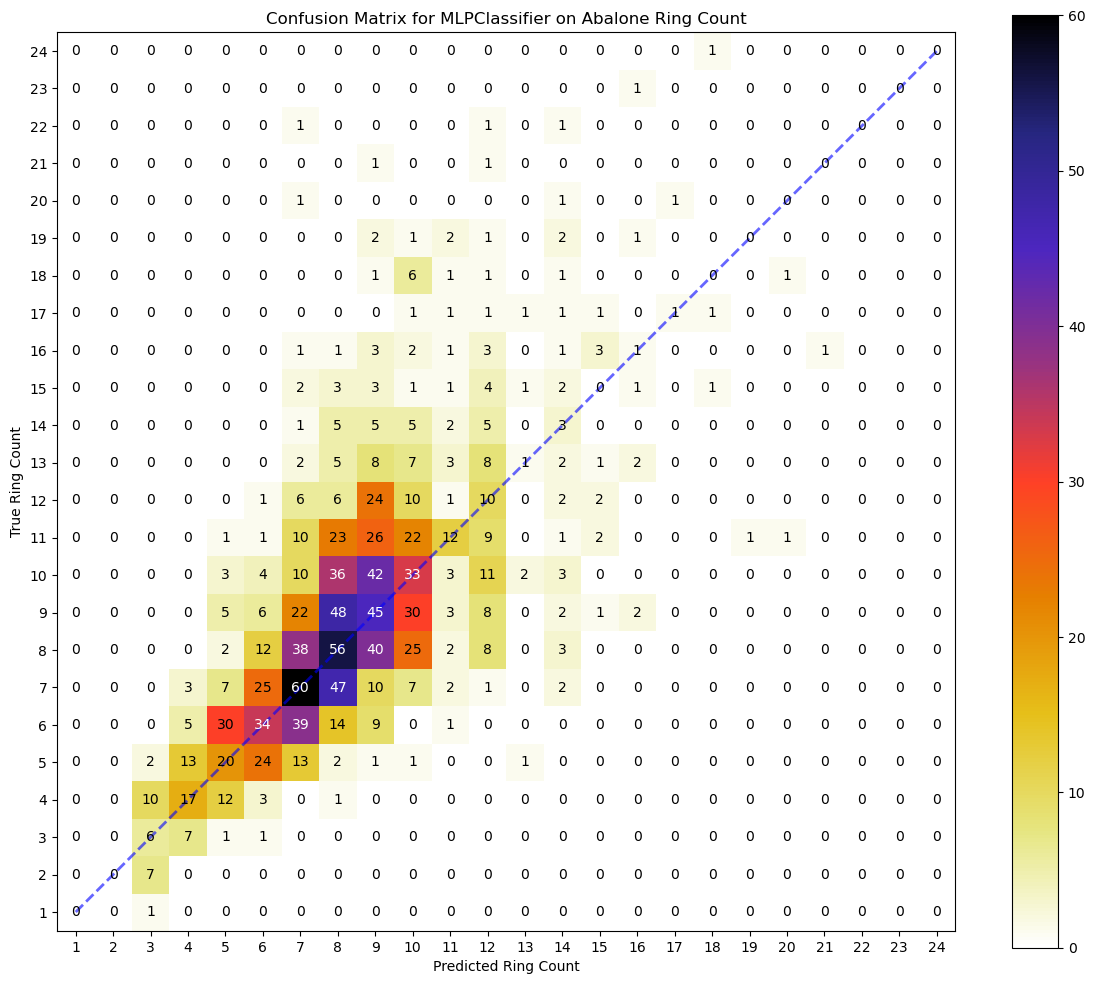

In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix with the origin at the bottom left
plt.figure(figsize=(12, 10))
plt.imshow(cm, cmap=plt.cm.CMRmap_r, origin='lower')
plt.title('Confusion Matrix for MLPClassifier on Abalone Ring Count')
plt.colorbar()

# Adjust tick marks to start at 1 instead of 0
tick_marks = np.arange(1, len(np.unique(y_test)) + 1)
plt.xticks(tick_marks - 1, tick_marks)
plt.yticks(tick_marks - 1, tick_marks)

# Labeling the plot
plt.xlabel('Predicted Ring Count')
plt.ylabel('True Ring Count')

# Adding the numbers inside the plot and the diagonal line
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center", 
                 color="white" if cm[i, j] > cm.max() / 2. else "black")

plt.plot([0, cm.shape[0]-1], [0, cm.shape[1]-1], color='blue', linestyle='--', linewidth=2, alpha=0.6)

plt.tight_layout()
plt.show()

## Adding some ratio features

In [ ]:
# Weight Ratios
train['shucked_to_viscera'] = train['shucked_weight'] / train['viscera_weight']
train['shell_to_viscera'] = train['shell_weight'] / train['viscera_weight']

# Weight to Dimension Ratios
train['whole_diameter'] = train['whole_weight'] / train['diameter']
train['length_whole'] = train['length'] / train['whole_weight']


X_train_MK2 = train[['length', 'diameter', 'height', 'whole_weight', 'viscera_weight', 'shell_weight',
                      'shucked_to_viscera', 'shell_to_viscera', 'diameter_to_length', 'whole_diameter', 'length_whole', 'rings']]

y_train_MK2 = train['rings']

NameError: name 'train' is not defined

## Looking at the correlation again

In [ ]:
# Changing the sex column to a floating point 0, 0.5 or 1 for the .corr() function
# 1 = Female 
# 0 = Male
# 0.5 = Infant
attributeInformationMK2 = {
    # Nicely formatted column names
    "Name": [
        'Length', 'Diameter', 'Height', 'Whole weight', 'Viscera weight', 'Shell weight',
                      'Shucked to viscera', 'Shell to viscera', 'Diameter to length', 'Whole diameter', 'Length whole']
    }

# Setting up output dataframe
abaloneDataCorr = X_train_MK2.copy()

# Compute correlation matrix
corMK2 = abaloneDataCorr.corr()

# Prepare labels from attributeInformation (excluding 'Sex')
labels = attributeInformationMK2['Name']

# Plot the heatmap with labels
plt.figure(figsize=(20, 15))
sns.heatmap(corMK2, annot=True, cmap=plt.cm.CMRmap_r, linewidths=.5, xticklabels=labels, yticklabels=labels)
plt.title('Correlation Heatmap of Abalone Data', size=16)
plt.show()

NameError: name 'X_train_MK2' is not defined

In [ ]:
X_train_MK2 = X_train_MK2.drop('rings', axis=1)

# Train the MLPClassifier
mlpMK2 = MLPClassifier(n_iter_no_change=200, activation='relu', alpha= 0.075, hidden_layer_sizes= (150, 85, 30), learning_rate='adaptive', learning_rate_init= 0.0125, max_iter= 1000000, solver= 'sgd', random_state=0, verbose=True, momentum= 0.99)
mlpMK2.fit(X_train_MK2, y_train_MK2)

# Perform cross-validation and print the cross-validation score
cv_scoresMK2 = sk.model_selection.cross_val_score(mlpMK2, X_train_MK2, y_train_MK2, cv=10)
print(f"Cross-validation accuracy scores: {cv_scoresMK2}")
print(f"Mean cross-validation accuracy: {cv_scoresMK2.mean():.4f}")

# Make predictions
y_predMK2 = mlp.predict(X_test)

# Calculate and print the accuracy on the test set
test_accuracyMK2 = accuracy_score(y_test, y_predMK2)
print(f"Test set accuracy: {test_accuracyMK2:.4f}")

Iteration 1, loss = 3.14992530
Iteration 2, loss = 2.70131940
Iteration 3, loss = 2.53151526
Iteration 4, loss = 2.36289634
Iteration 5, loss = 2.26739694
Iteration 6, loss = 2.20840282
Iteration 7, loss = 2.14691666
Iteration 8, loss = 2.08038602
Iteration 9, loss = 2.05076811
Iteration 10, loss = 2.04624341
Iteration 11, loss = 2.03048895
Iteration 12, loss = 2.02864933
Iteration 13, loss = 2.02074659
Iteration 14, loss = 2.01598988
Iteration 15, loss = 2.00364320
Iteration 16, loss = 2.00600355
Iteration 17, loss = 1.99503208
Iteration 18, loss = 1.99684813
Iteration 19, loss = 1.99128216
Iteration 20, loss = 1.98826293
Iteration 21, loss = 1.98112294
Iteration 22, loss = 1.98002656
Iteration 23, loss = 1.98522215
Iteration 24, loss = 1.97523732
Iteration 25, loss = 1.97121324
Iteration 26, loss = 1.96902819
Iteration 27, loss = 1.96735358
Iteration 28, loss = 1.96523589
Iteration 29, loss = 1.96406769
Iteration 30, loss = 1.96215532
Iteration 31, loss = 1.95940013
Iteration 32, los

In [ ]:
# Compute the confusion matrix
cmMK2 = confusion_matrix(y_test, y_predMK2)

# Plot the confusion matrix with the origin at the bottom left
plt.figure(figsize=(12, 10))
plt.imshow(cmMK2, cmap=plt.cm.CMRmap_r, origin='lower')
plt.title('Confusion Matrix for MLPClassifier on Abalone Ring Count')
plt.colorbar()

# Adjust tick marks to start at 1 instead of 0
tick_marks = np.arange(1, len(np.unique(y_test)) + 1)
plt.xticks(tick_marks - 1, tick_marks)
plt.yticks(tick_marks - 1, tick_marks)

# Labeling the plot
plt.xlabel('Predicted Ring Count')
plt.ylabel('True Ring Count')

# Adding the numbers inside the plot and the diagonal line
for i in range(cmMK2.shape[0]):
    for j in range(cmMK2.shape[1]):
        plt.text(j, i, cmMK2[i, j], ha="center", va="center", 
                 color="white" if cmMK2[i, j] > cmMK2.max() / 2. else "black")

plt.plot([0, cmMK2.shape[0]-1], [0, cmMK2.shape[1]-1], color='blue', linestyle='--', linewidth=2, alpha=0.6)

plt.tight_layout()
plt.show()